# Abstract

## This notebook includes: a sample of clean and dirty data, heart rate analysis with noise removal (optional), Bayevsky stress index, prediction of ECG signal behavior

# Data

In [11]:
cleardata = hp.get_data('e0110.csv')
dirtydata = hp.get_data('118e24.csv')

# Heartbeat data analysis and plots

In [4]:
import heartpy as hp
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import resample

sample_rate = 360

## prepare for analysis

### let's look at our data

### Simple way

bpm: 201.573651
ibi: 297.657952
sdnn: 137.536303
sdsd: 60.053671
rmssd: 290.231625
pnn20: 1.000000
pnn50: 1.000000
hr_mad: 5.555556
sd1: 204.588310
sd2: 70.172792
s: 45102.378591
sd1/sd2: 2.915493
breathingrate: 0.263922


<Figure size 1200x400 with 0 Axes>

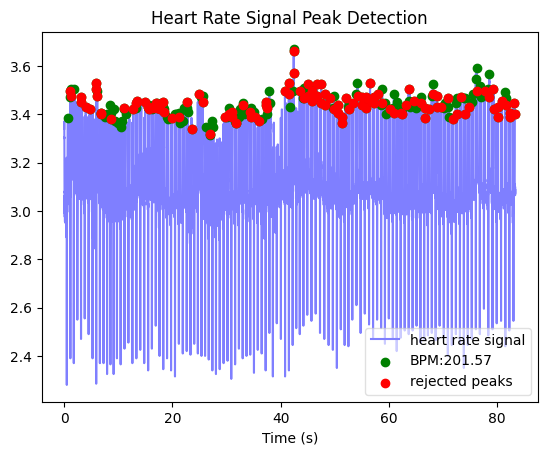

In [13]:
# plt.figure(figsize=(12,4))
# plt.plot(data)
# plt.show()

# #and zoom in a bit
# plt.figure(figsize=(12,4))
# plt.plot(data[0:2500])
# plt.show()

wd, m = hp.process(data, sample_rate)

#visualise in plot of custom size
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#display computed measures
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

### Function

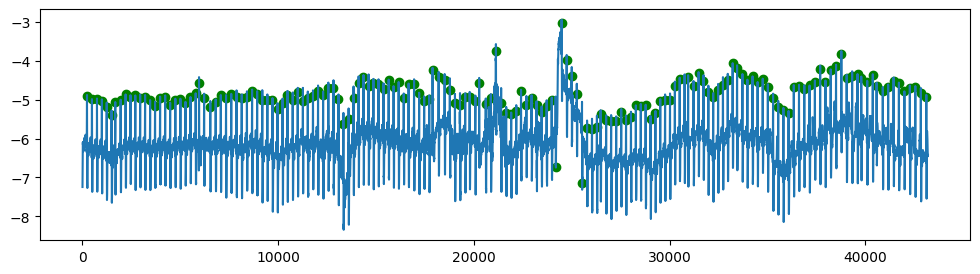

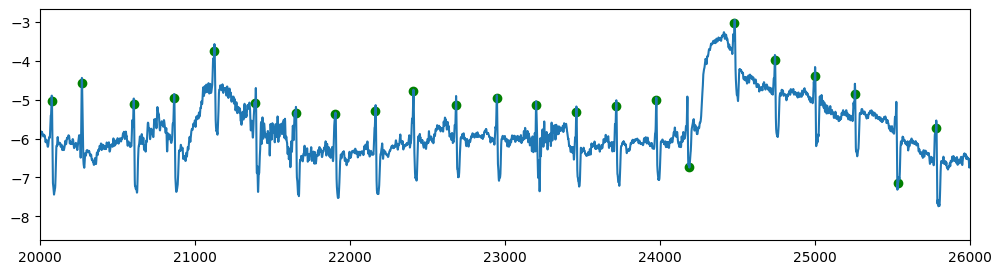

In [10]:
def load_visualise(data_file, annotations_file):
    '''
    loads data and annotations, plots them 
    and returns data and annotations
    '''
    
    
    #load the data
    ecg = hp.get_data(data_file)

    #get the annotations
    annotations = hp.get_data(annotations_file)
    #explore signal
    plt.figure(figsize=(12,3))
    plt.plot(ecg)
    plt.scatter(annotations, [ecg[int(x)] for x in annotations], color='green')
    plt.show()

    #and zoom in
    plt.figure(figsize=(12,3))
    plt.plot(ecg)
    plt.scatter(annotations, [ecg[int(x)] for x in annotations], color='green')
    plt.xlim(20000, 26000)
    plt.show()
    
    return ecg, annotations

ecg, annotations = load_visualise('118e24.csv', '118e24_ann.csv')

## main analysis

### Clean signal

bpm: 107.484814
ibi: 558.218391
sdnn: 17.954331
sdsd: 5.597440
rmssd: 9.109775
pnn20: 0.020979
pnn50: 0.000000
hr_mad: 11.111111
sd1: 6.439475
sd2: 24.632525
s: 498.321060
sd1/sd2: 0.261422
breathingrate: 0.100000
bpm: 107.569359
ibi: 557.779655
sdnn: 18.046703
sdsd: 5.581782
rmssd: 9.027959
pnn20: 0.034014
pnn50: 0.000000
hr_mad: 9.722222
sd1: 6.383644
sd2: 24.796809
s: 497.295263
sd1/sd2: 0.257438
breathingrate: 0.100000

nonlinear poincare measures:
sd1: 6.383644
sd2: 24.796809
s: 497.295263
sd1/sd2: 0.257438


<Figure size 1200x400 with 0 Axes>

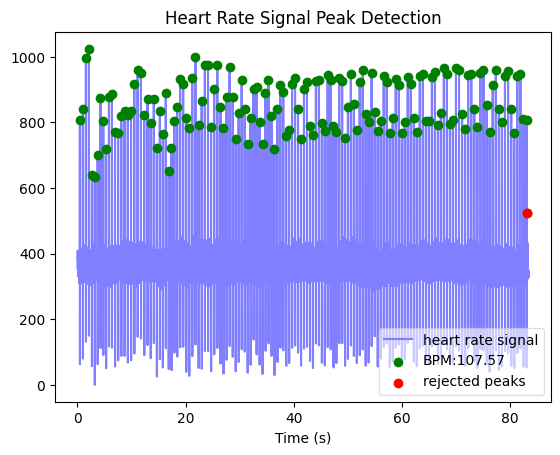

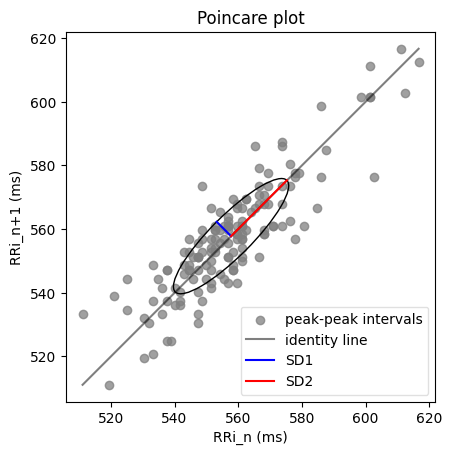

In [19]:
filtered = hp.filter_signal(data, cutoff = 0.05, sample_rate = sample_rate, filtertype='notch')

#run analysis
wd, m = hp.process(hp.scale_data(data), sample_rate)

#display computed measures
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

#resample the data. Usually 2, 4, or 6 times is enough depending on original sampling rate
resampled_data = resample(data, len(filtered) * 2)

#And run the analysis again. Don't forget to up the sample rate as well!
wd, m = hp.process(hp.scale_data(resampled_data), sample_rate * 2)

#visualise in plot of custom size
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#display computed measures
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

hp.plot_poincare(wd, m)

#print poincare measures
poincare_measures = ['sd1', 'sd2', 's', 'sd1/sd2']
print('\nnonlinear poincare measures:')
for measure in poincare_measures:
    print('%s: %f' %(measure, m[measure]))

### Dirty signal

## baevsky stress index

# Prediction of signal behavior